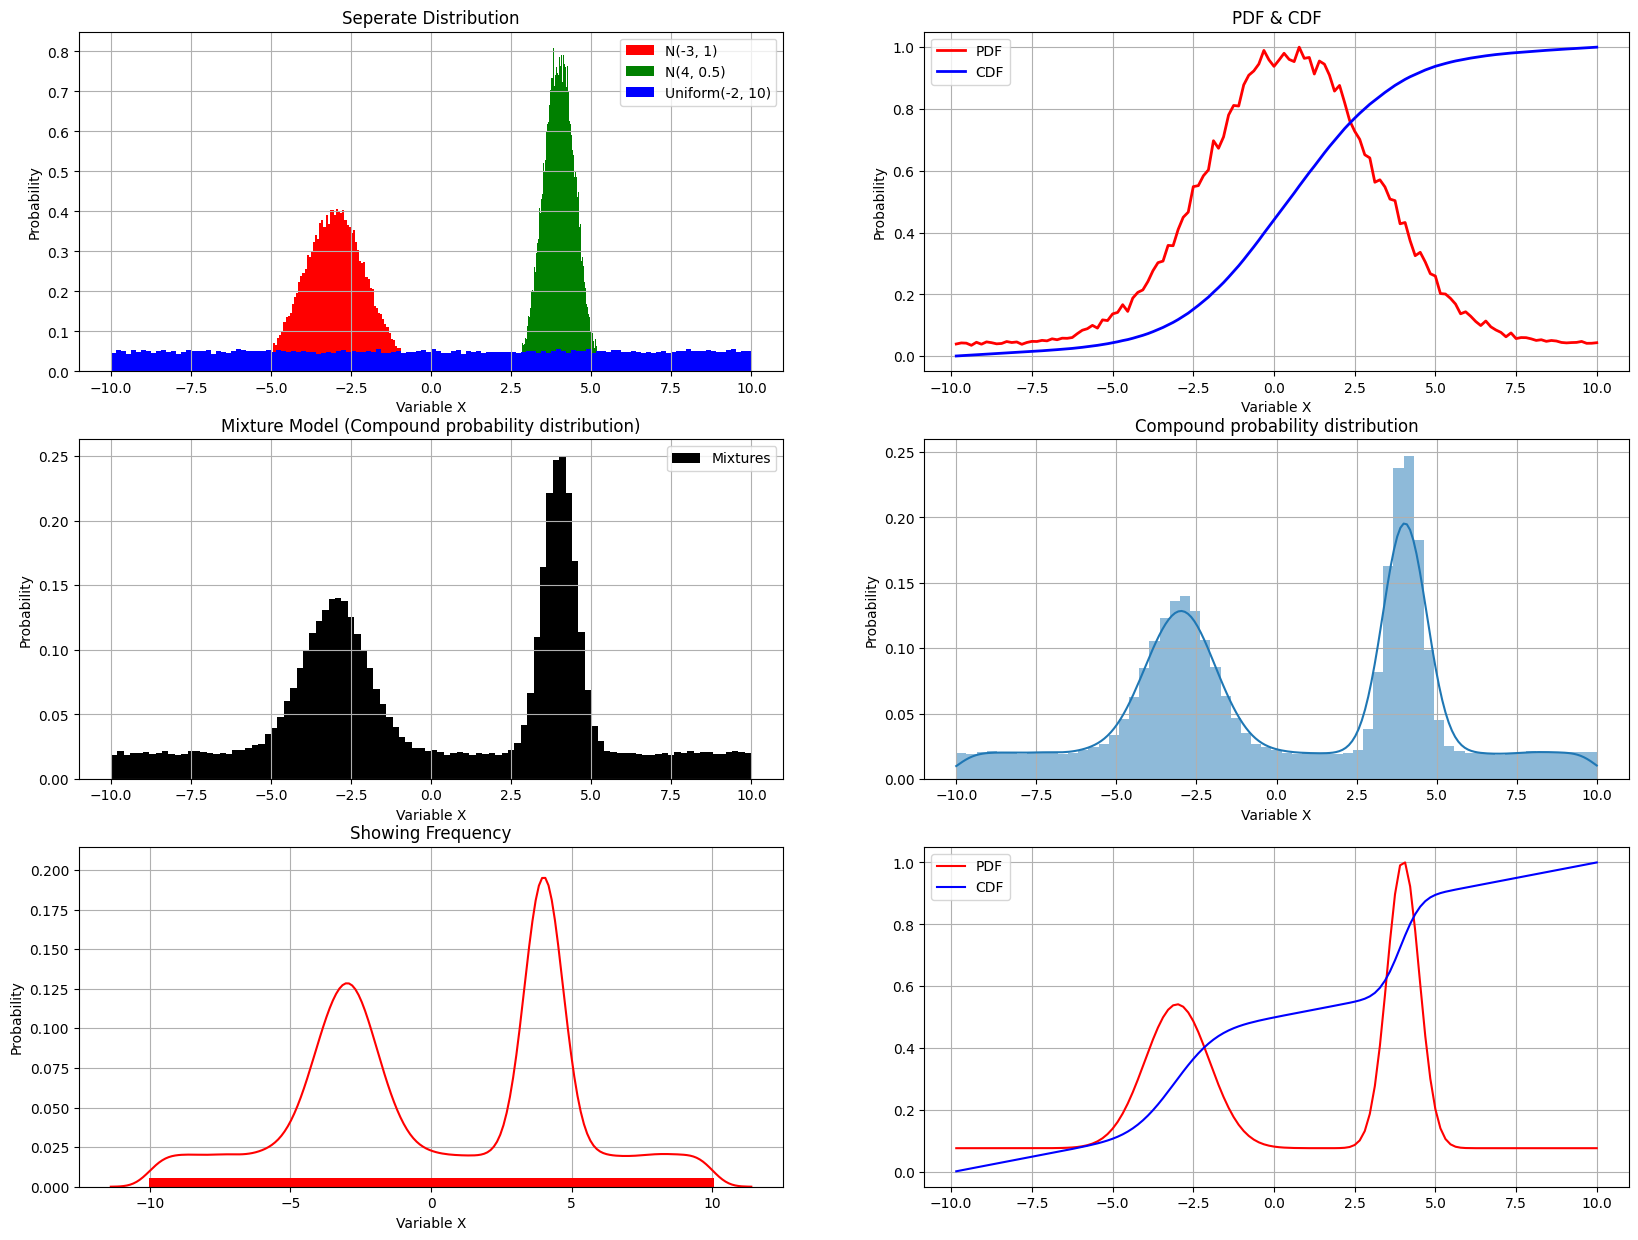

In [3]:
# block 1: 資料產生/模擬器
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import random
import math
import seaborn as sns

np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=100000, suppress=True)
N = 10**5

r1, r2, r3 = 0.3, 0.3, 0.4
mean1, dev1, N1 = -3, 1, int(r1*N)
mean2, dev2, N2 = 4, 0.5, int(r2*N)
L, R, N3 = -10, 10, int(r3*N)

np.random.seed(1)
# 第一張圖
f1 = plt.figure(figsize=(20,15))
ax1 = f1.add_subplot(321)
Xn1 = np.random.normal(mean1, dev1, N1)
count1, bins1, ignored1 = plt.hist(Xn1, 128,density=True, stacked=True, color='r', label="N(-3, 1)") 
Xn2 = np.random.normal(mean2, dev2, N2)
count2, bins2, ignored2 = plt.hist(Xn2, 128, density=True, stacked=True, color='g', label="N(4, 0.5)") 
Xu3 = np.random.uniform(L, R, N3)
count3, bins3, ignored3 = plt.hist(Xu3, 128, density=True, stacked=True, color='b', label="Uniform(-2, 10)")

plt.legend()
plt.title("Seperate Distribution")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第二張圖
count = r1*count1 + r2*count2 + r3*count3
count = count1 + count2 + count3
X = bins3[1:]

pdfX = count/sum(count)
cdfX = np.cumsum(pdfX)
ax2 = f1.add_subplot(322)
ax2.plot(X, pdfX/np.max(pdfX), linewidth=2, color='r', label="PDF")
ax2.plot(X, cdfX, linewidth=2, color='b', label="CDF")
plt.legend()
plt.title("PDF & CDF")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第三張圖
# Compound Misture
ax3 = f1.add_subplot(323)
Xall = np.concatenate((Xn1, Xn2, Xu3), axis=None)
freq, binsall, ignored = plt.hist(Xall, 100, density=True, stacked=True, color='k', label="Mixtures")
plt.legend()
plt.title("Mixture Model (Compound probability distribution)")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第四張圖
# Shown by seaborn
ax4 = f1.add_subplot(324)
ax4 = sns.histplot(Xall, kde=True, stat="density", linewidth=0)
# ax4 = sns.distplot(Xall)
plt.title("Compound probability distribution")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第五張圖
# Shown Frequency
ax5 = f1.add_subplot(325)
# ax5 = sns.distplot(Xall, rug=True, hist=False, color='red')
ax5 = sns.kdeplot(Xall, color='red')
ax5 = sns.rugplot(Xall, color='red')
plt.title("Showing Frequency")
plt.ylabel("Probability")
plt.xlabel("Variable X")
plt.grid(True)

# 第六張圖
ax6 = f1.add_subplot(326)
pdf1 = 1/(dev1*np.sqrt(2*np.pi))*np.exp(-(X-mean1)**2/(2*dev1**2))
pdf2 = 1/(dev2*np.sqrt(2*np.pi))*np.exp(-(X-mean2)**2/(2*dev2**2))
pdf3 = np.ones(X.size)/(R-L)
pdf_merge  = r1 * pdf1 + r2 * pdf2 + r3 * pdf3
cdf_merge = np.cumsum(pdf_merge)
ax6.plot(X, pdf_merge/np.max(pdf_merge), color="r", label="PDF")
ax6.plot(X, cdf_merge/sum(pdf_merge), color="b",label="CDF")
plt.legend()
plt.grid(True)
plt.show()

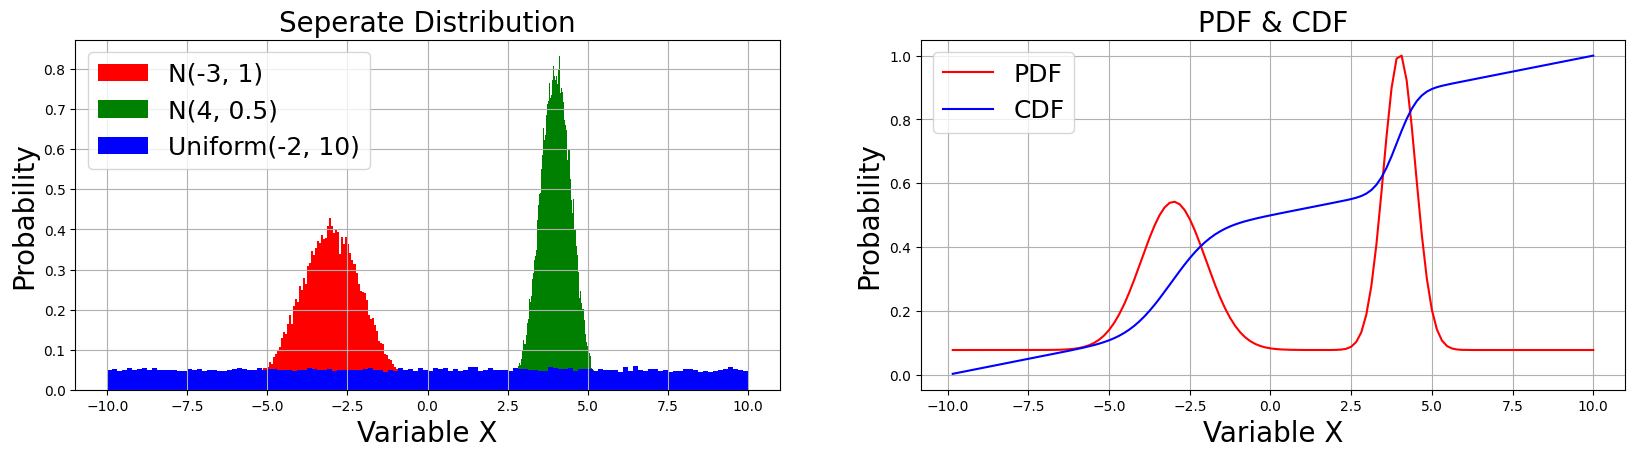

In [4]:
import scipy
f3 = plt.figure(figsize=(20,10))

ax1 = f3.add_subplot(221)
Xn1 = np.random.normal(mean1, dev1, N1)
count1, bins1, ignored1 = plt.hist(Xn1, 128,density=True, stacked=True, color='r', label="N(-3, 1)") 
Xn2 = np.random.normal(mean2, dev2, N2)
count2, bins2, ignored2 = plt.hist(Xn2, 128, density=True, stacked=True, color='g', label="N(4, 0.5)") 
Xu3 = np.random.uniform(L, R, N3)
count3, bins3, ignored3 = plt.hist(Xu3, 128, density=True, stacked=True, color='b', label="Uniform(-2, 10)")

plt.legend(fontsize=18)
plt.title("Seperate Distribution",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.grid(True)

ax2 = f3.add_subplot(222)
pdf1 = 1/(dev1*np.sqrt(2*np.pi))*np.exp(-(X-mean1)**2/(2*dev1**2))
pdf2 = 1/(dev2*np.sqrt(2*np.pi))*np.exp(-(X-mean2)**2/(2*dev2**2))
pdf3 = np.ones(X.size)/(R-L)
pdf_merge  = r1 * pdf1 + r2 * pdf2 + r3 * pdf3
cdf_merge = np.cumsum(pdf_merge)
ax2.plot(X, pdf_merge/np.max(pdf_merge), color="r", label="PDF")
ax2.plot(X, cdf_merge/sum(pdf_merge), color="b",label="CDF")
plt.legend(fontsize=18)
plt.title("PDF & CDF",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.grid(True)




In [5]:
len(Xall)

100000

In [6]:
len(X)

128

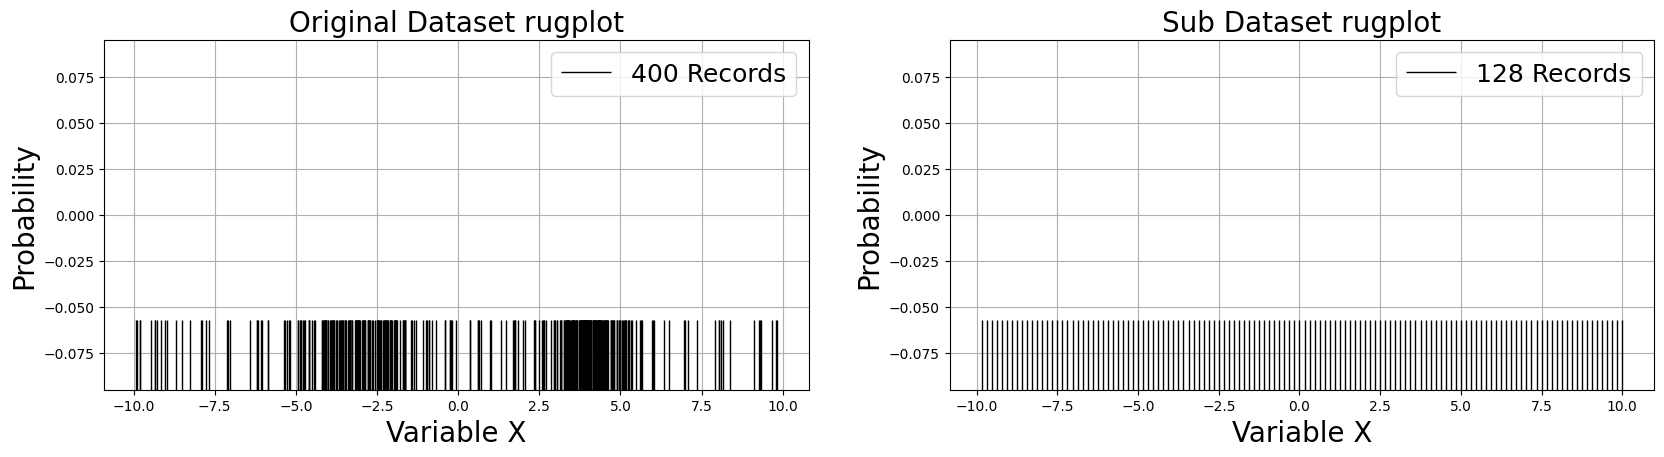

In [7]:
f4 = plt.figure(figsize=(20,10))
ax3 = f4.add_subplot(223)

# 100000/250=400筆

sXall = Xall[:len(Xall)-1:250]
ax3 = sns.rugplot(sXall, color='black',height=0.2,label='400 Records')
plt.title("Original Dataset rugplot",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)

ax4 = f4.add_subplot(224)
# bin=128筆
ax4 = sns.rugplot(X, color='black',height=0.2,label='128 Records')
plt.title("Sub Dataset rugplot",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)

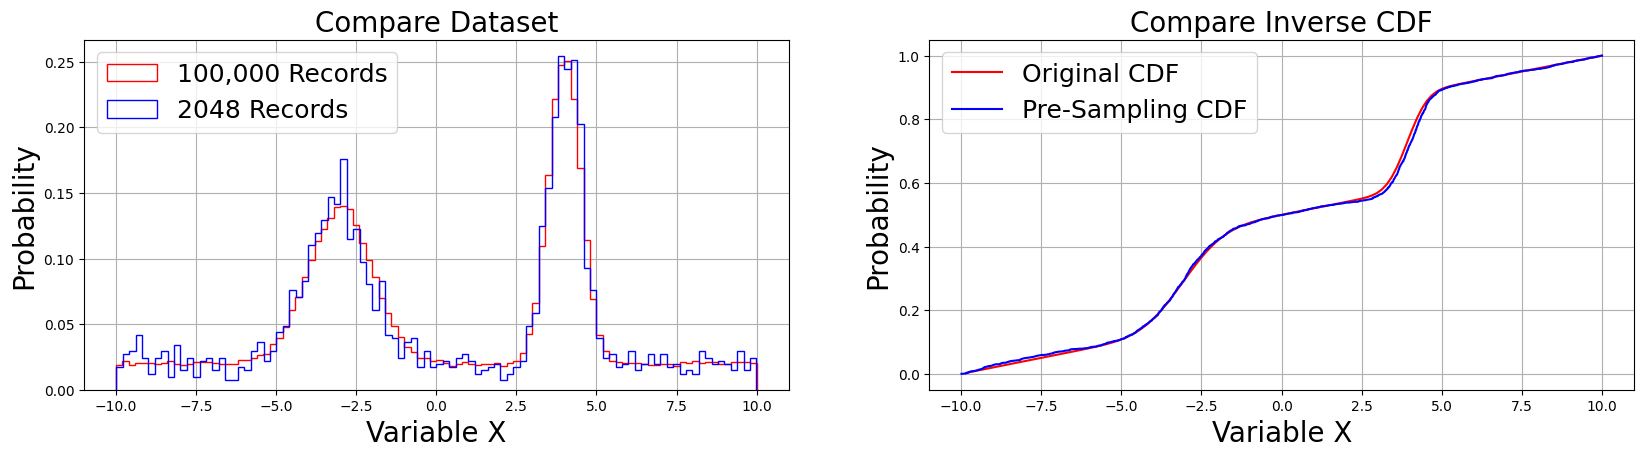

In [8]:
# Inverse transform sampling method:
# Creating a random number generator for arbitrary distributions.
# Suppose we have some random samples with an unknown distribution.
# We can still use the inverse transform method to create a random number generator
# from a random sample, by estimating the inverse CDF function using interpolation(插值法).
# 也就是求𝑥=𝐶𝐷𝐹^(−1)(𝑢), 𝑢 是 python 產生的均勻分布函數 0.0 < rand() < 1

from scipy.interpolate import interp1d
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(Xall)
inv_cdf = interp1d(ecdf.y, ecdf.x, bounds_error=False, assume_sorted=True)

# block 2: 預取樣
np.random.seed(10)
u = np.random.uniform(0, 1, 2048)
xs = np.linspace(0, 1, 2048)
ys = inv_cdf(u)

# block 3: 排序
ys = np.sort(ys)
norm_cdf = cdf_merge/sum(pdf_merge)

f5 = plt.figure(figsize=(20,10))
ax1 = f5.add_subplot(221)
ax1.hist(Xall, 100, histtype='step', color='r', density=True, label="100,000 Records")
ax1.hist(ys, 100, histtype='step', color='b', density=True, label="2048 Records")
plt.title("Compare Dataset",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.legend(loc=2,fontsize=18)

plt.grid(True)


ax2 = f5.add_subplot(222)
ax2.plot(X, norm_cdf, color="r", label="Original CDF")
ax2.plot(ys, xs, color="b", label="Pre-Sampling CDF")
plt.title("Compare Inverse CDF",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)



# def intr(data):
#     intr = np.diff(data,axis=0)
#     return np.around(intr,6)

# print("X-axis Interval:", intr(xs))
# print("Y-axis Interval:", intr(ys))

In [9]:
len(Xall)

100000

In [10]:
len(xs)

2048

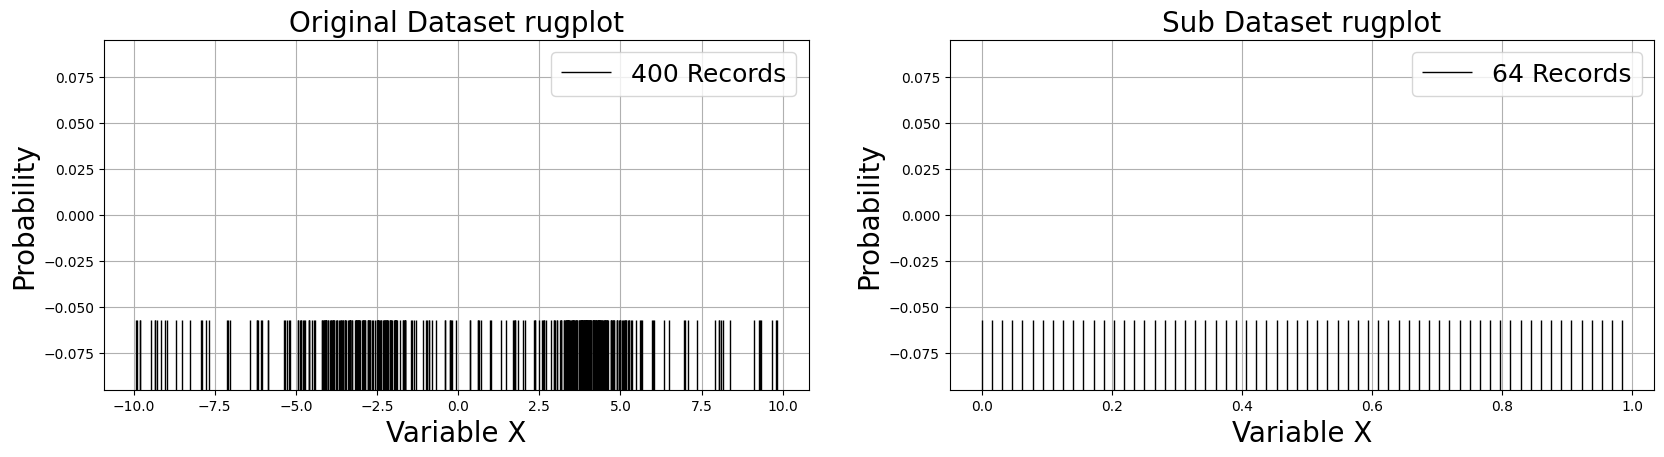

In [13]:
f6 = plt.figure(figsize=(20,10))

ax3 = f6.add_subplot(221)
# 100000/250=400筆
sXall = Xall[:len(Xall)-1:250]
ax3 = sns.rugplot(sXall, color='black',height=0.2,label='400 Records')
plt.title("Original Dataset rugplot",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
# 2048/32=64筆
ax4 = f6.add_subplot(222)
sxs = xs[:len(xs)-1:32]
ax4 = sns.rugplot(sxs, color='black',height=0.2,label='64 Records')
plt.title("Sub Dataset rugplot",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.xlabel("Variable X",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)

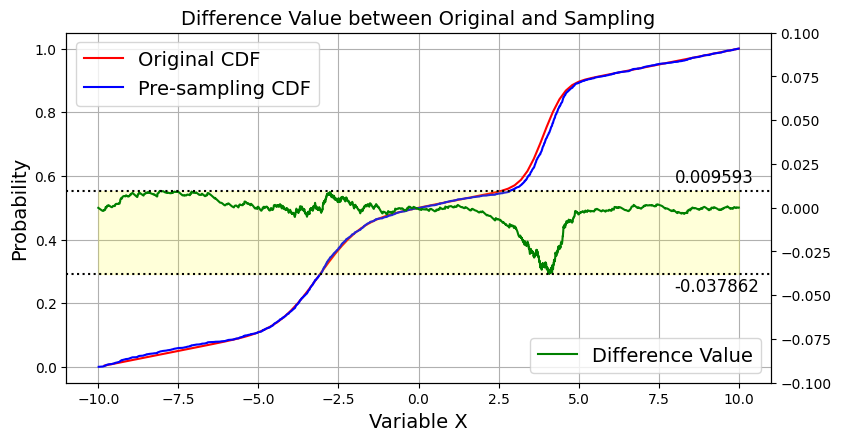

In [63]:
f7 = plt.figure(figsize=(20,10))
ax1 = f7.add_subplot(221)

f1 = interp1d(X, norm_cdf, kind="slinear", fill_value="extrapolate")
f2 = interp1d(ys, xs, kind="slinear", fill_value="extrapolate")
x1new = np.linspace(-10,10,10000)
y1new = f1(x1new)
y2new = f2(x1new)
ax1.plot(X, norm_cdf, color="r", label="Original CDF")
ax1.plot(ys, xs, color="b", label="Pre-sampling CDF")
# ax1.text(-4.8,0,"These curves are using slinear interpolation.",fontsize=10, 
#          bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.2'))

plt.legend(fontsize=14)
plt.grid(True)
plt.title("Difference Value between Original and Sampling",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.xlabel("Variable X",fontsize=14)

ax2 = ax1.twinx()
ax2.plot(x1new, (y2new-y1new), color="g", label="Difference Value")
ax2.axhline(y = max(y2new-y1new), color='black', linestyle=":")
ax2.axhline(y = min(y2new-y1new), color='black', linestyle=":")
ax2.text(8, max(y2new-y1new)+0.005, round(max(y2new-y1new),6), size = 12)
ax2.text(8, min(y2new-y1new)-0.01, round(min(y2new-y1new),6), size = 12)
ax2.fill_between(x1new, max(y2new-y1new), min(y2new-y1new), alpha = 0.15, color='yellow')
ax2.set_ylim(-0.1,0.1)
plt.legend(loc=4,fontsize=14)